In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from PIL import Image
import math
from testing import *

In [2]:
joint_name = ['HeadF', 'HeadB', 'HeadL', 'SpineF', 'SpineM', 'SpineL', 
            'Offset1', 'Offset2', 'HipL', 'HipR', 'ElbowL', 'ArmL', 
            'ShoulderL', 'ShoulderR', 'ElbowR', 'ArmR', 'KneeR', 
            'KneeL', 'ShinL', 'ShinR']

joints_idx = [[1, 2], [2, 3], [1, 3], [2, 4], [1, 4], [3, 4], [4, 5], 
            [5, 6], [4, 7], [7, 8], [5, 8], [5, 7], [6, 8], [6, 9], 
            [6, 10], [11, 12], [4, 13], [4, 14], [11, 13], [12, 13], 
            [14, 15], [14, 16], [15, 16], [9, 18], [10, 17], [18, 19], 
            [17, 20]]

def loadMatFile(fileName):
    mat = loadmat('trainTestSplit.mat')[fileName]
    print("loading:", fileName)
    return mat

def plotKnownOrder(matFile, img_numb):
    mat = matFile[img_numb]
    x = mat[0]
    y = mat[1]
    z = mat[2]
    # loading plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # adding points, labels and lines
    try:
        ax.scatter(x,y,z, color='#ff5e5e', s =10, marker='x')
    except:
        pass
    addLabels(ax, x, y, z)
    drawLines(ax, x, y, z)
    dist = drawAllLines(ax, x, y, z)

    # Labeling plot
    ax.set_title("Rat positioning")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    plt.show()
    heatMap(dist)
    return dist

def addLabels(ax, x, y, z):
    points_array = []
    # run through all the points to add labels
    for i in range(len(x)):
        try:
            points_array.append([x[i], y[i], z[i]])
            # label = np.around(points_array[i]).astype(int)
            # label = joint_name[i]
            label = ""
            ax.text(x[i], y[i], z[i], label)
            # print(i, ":", points_array[i], joint_name[i])
        except:
            pass
    return points_array

def drawLines(ax,x, y, z):
    # run through all the connections to draw the points
    for i in range(len(joints_idx)):
        try: 
            # Getting both points to draw line
            idx = joints_idx[i]
            x_line = [x[idx[0]-1], x[idx[1]-1]]
            y_line = [y[idx[0]-1], y[idx[1]-1]]
            z_line = [z[idx[0]-1], z[idx[1]-1]]
            z_coord_1 = x[idx[0]-1], y[idx[0]-1], z[idx[0]-1]
            z_coord_2 = x[idx[1]-1], y[idx[1]-1], z[idx[1]-1]

            # Draw lines
            if i < 3: 
                ax.plot(x_line, y_line, z_line, c="#064ea1", linewidth=4)
            elif i < 6:
                ax.plot(x_line, y_line, z_line, c="#64ccd1", linewidth=4)
            else:
                ax.plot(x_line, y_line, z_line, c="#46b8a7", linewidth=4)
        except:
            pass

def drawAllLines(ax,x, y, z):
    joint_len = len(joint_name)
    all_lines = []
    distance = []

    for i in range(joint_len):
        point_dist = []
        for j in range(joint_len):
            point_dist.append(measureDistance(x[i], y[i], z[i], x[j], y[j], z[j]))
            if (not([i,j] in all_lines)):
                x_line = [x[i], x[j]]
                y_line = [y[i], y[j]]
                z_line = [z[i], z[j]]
                ax.plot(x_line, y_line, z_line, color='#b1d8fc', linewidth=0.5)
                all_lines.append([i,j])
                all_lines.append([j,i])
        distance.append(point_dist)
    return distance

def getDistance(mat):
    joint_len = len(joint_name)
    x = mat[0]
    y = mat[1]
    z = mat[2]
    distance = []
    for i in range(joint_len):
        point_dist = []
        for j in range(joint_len):
            point_dist.append(measureDistance(x[i], y[i], z[i], x[j], y[j], z[j]))
        distance.append(point_dist)
    return distance

# def getPointDistance(mat):
#     joint_len = len(joint_name)
#     x = mat[0]
#     y = mat[1]
#     z = mat[2]
#     distance = []
#     for i in range(joint_len):
#         point_dist = []
#         for j in range(joint_len):
#             point_dist.append(measureDistance(x[i], y[i], z[i], x[j], y[j], z[j]))
#         distance.append(point_dist)
#     return distance


def measureDistance(x_1, y_1, z_1, x_2, y_2, z_2):
    x = (x_1 - x_2)
    y = (y_1 - y_2)
    z = (z_1 - z_2)
    return np.sqrt(x**2 + y**2 + z**2)

def heatMap(dist):
    plt.imshow(dist) 
    plt.colorbar()
    plt.grid(False)
    plt.show()

# def getAngles(matFile, numb):
#     mat = matFile[numb]
#     x = np.array(mat[0])
#     y = np.array(mat[1])
#     z = np.array(mat[2])
#     angles = []
#     for i in range(len(x)):
#         curr_point = []
#         for j in range(len(y)):
#             for k in range(len(z)):
#                 a = [x[i], y[i], z[i]]
#                 b = [x[j], y[j], z[j]]
#                 c = [x[k], y[k], z[k]]
#                 if not ((a == b) or (b == c) or (c == a)):
#                     a = np.array(a)
#                     b = np.array(b)
#                     c = np.array(c)
#                     ba = a - b
#                     bc = c - b
#                     cosine = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
#                     angle = np.arccos(cosine)
#                     angle = np.degrees(angle)
#                     curr_point.append(angle)
#                 else:
#                     curr_point.append(0)
#         angles.append(curr_point)
#     angles = np.array(angles)
#     angles = angles.reshape(20, 20, 20)
#     print(angles.shape)
#     return(angles)

def getDistData (fileName, numb):
    mat = loadMatFile(fileName)
    training = []
    for i in range(numb):
        dist = np.array(getDistance(mat[i]))
        for i in dist:
            temp = []
            norm = distNorm(i)
            temp.append(norm)
            training.append(temp)
    training = np.array(training)
    return training

def getLabelData(numb):
    output = []
    for i in range(numb):
        for j in range(len(joint_name)):
            output.append(j)
    output = np.array(output)
    return output

def distNorm(point):
    norm = [float(i)/max(point) for i in point]
    return norm

def distHist(dist):
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    labels = []
    for i in range(len(dist)):
        labels.append(i)
    ax.bar(labels,dist)
    plt.show()

def distPlot(dist):
    for i in range(len(dist)-1):
        plt.plot([i,i+1], [dist[i],dist[i+1]], 'ro-')
    plt.show()

In [3]:
def getRelAngles(matFile, numb):
    mat = matFile[numb]
    x = np.array(mat[0])
    y = np.array(mat[1])
    z = np.array(mat[2])
    ba = np.array([0.0, 0.0, 1.0])
    angles = []

    for i in range(len(x)):
        b = np.array([x[i], y[i], z[i]])
        temp = []
        for j in range(len(y)):
            c = np.array([x[j], y[j], z[j]])
            if not np.array_equal(b, c):
                # c = np.array(c)
                bc = c - b
                cosine = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
                angle = np.arccos(cosine)
                angle = np.degrees(angle)
                temp.append(angle)
            else:
                temp.append(0)
        angles.append(temp)
    heatMap(angles)
    return angles

# def angleHeatMap(mat_file, numb):
#     # angles = getAngles(mat_file, numb)
#     angles = getRelAngles(mat_file, numb)
#     heatMap(angles)

In [6]:
def distBin(dist, numb):
    indicies = []
    output = []
    bins = []
    for i in range(6):
        bins.append(i*0.2)
    for i in range(len(dist)):
        # distHist(dist[i][0])
        norm_dist = distNorm(dist[i][0])
        temp = np.ndarray.tolist(np.digitize(norm_dist, bins))
        indicies.append(temp)
    # print(indicies)
    for i in range(numb):
        # distHist(count(indicies[i], bins))
        # distPlot(count(indicies[i], bins))
        plotHist(count(indicies[i]), bins)

def count(indicies):
    output = []
    for i in range(6):
        output.append(indicies.count(i+1))
    return output

In [7]:
mat = loadMatFile('split1True')

loading: split1True


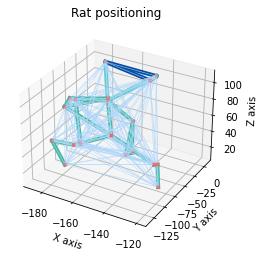

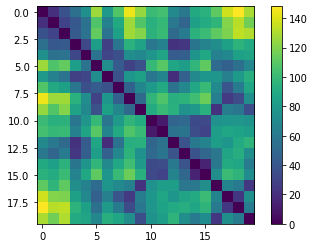

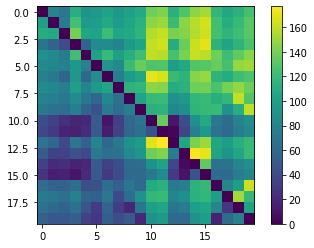

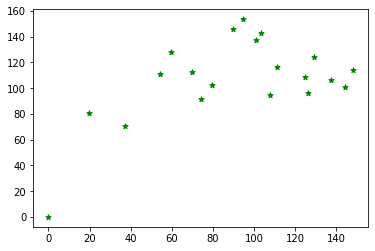

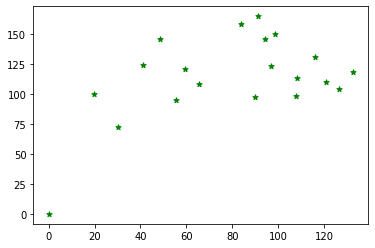

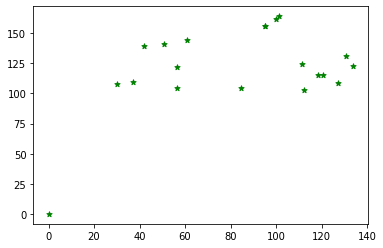

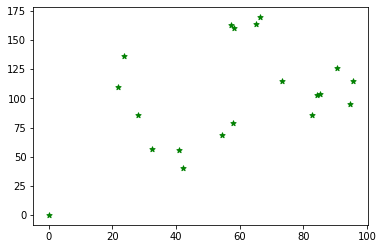

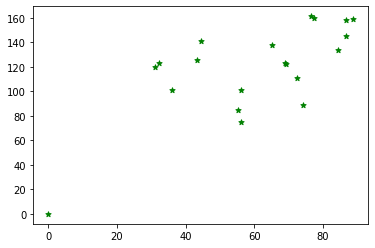

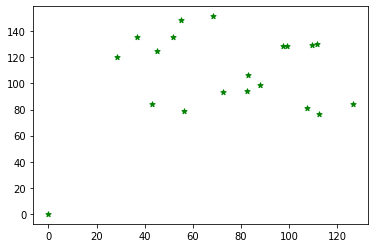

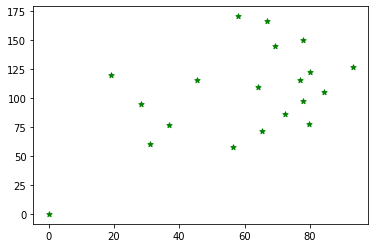

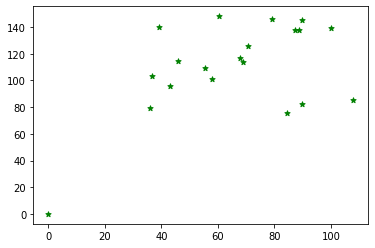

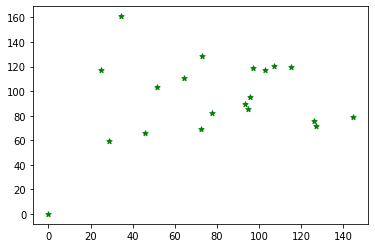

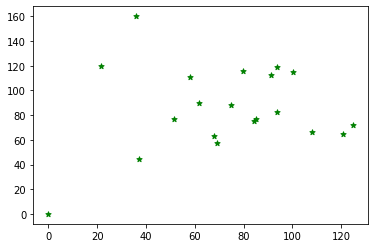

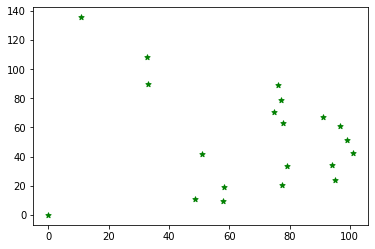

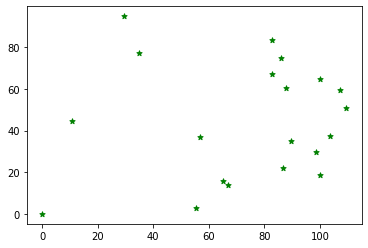

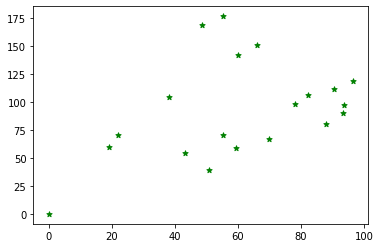

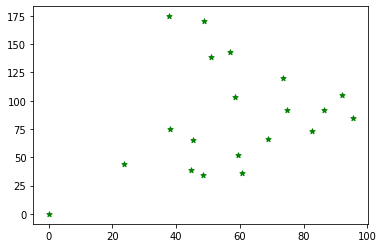

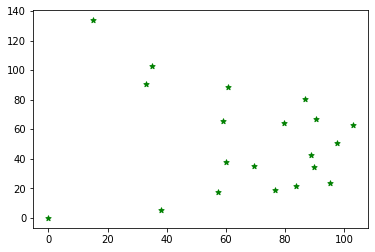

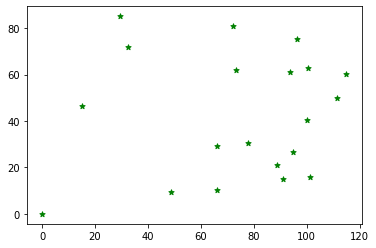

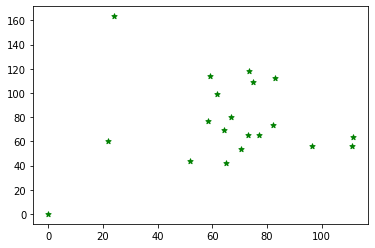

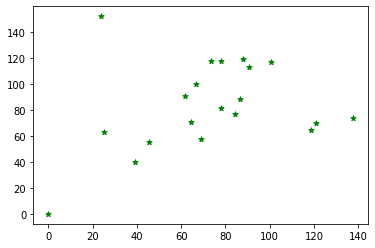

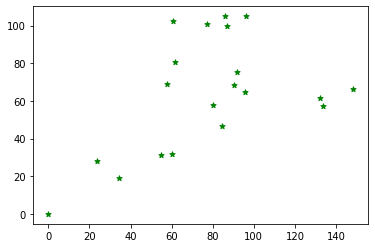

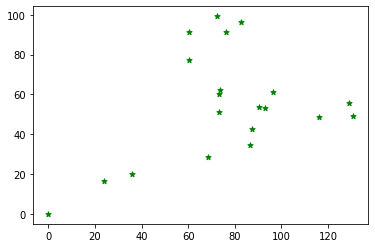

In [10]:
for i in range (1):
    dist = plotKnownOrder(mat, i)  
    angles = getRelAngles(mat, i)
    for i in range(len(dist)):
        plt.scatter(dist[i], angles[i], label= "stars", color= "green", marker= "*", s=30)
        plt.show()

In [104]:
def plotHist(bins, count):
    y = np.array(bins)
    x = np.array(count)

    print(x, y)
    X_Y_Spline = make_interp_spline(x, y)
    
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)

    fig = plt.figure()
    fig.add_subplot(111)
    plt.plot(X_, Y_, color='black')
    plt.fill_between(X_, Y_, color='black')
    fig.canvas.draw()

    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    data = np.array(data, dtype=np.uint8)
    img = Image.fromarray(data).convert('L')
    print(data.shape)
    plt.show() 
    showingImg(data)

def showingImg(data):
    data = np.array(data[:,:,0])
    plt.imshow(data)
    plt.show()

In [30]:
numb = 1
training_dist = getDistData('split1True', numb)

loading: split1True


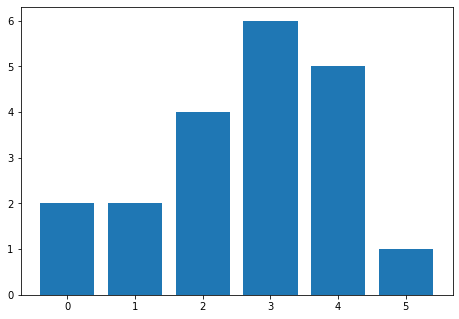

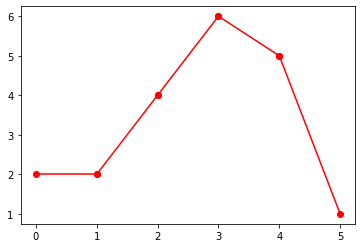

[0.  0.2 0.4 0.6 0.8 1. ] [2 2 4 6 5 1]
(288, 432, 3)
<ipython-input-104-b67fe5035ab3>:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


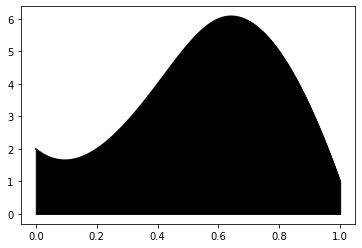

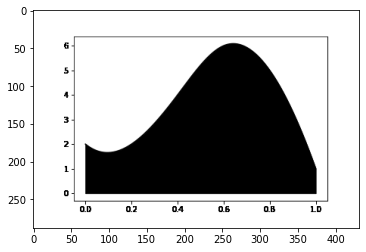

In [105]:
distBin(training_dist, numb)

In [6]:
import tensorflow as tf
numb = 500
training_dist = getDistData('split1True', numb)
testing_dist = getDistData('split2True', numb)
training_label = getLabelData(numb)
testing_label = getLabelData(numb)

loading: split1True
loading: split2True


19


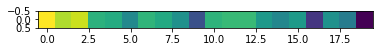

In [7]:
import matplotlib.pyplot as plt
image_index =  199
print(training_label[image_index]) # The label is 8
plt.imshow(testing_dist[image_index])

In [8]:
training_dist = training_dist.reshape(training_dist.shape[0], 1, 20, 1)
testing_dist = testing_dist.reshape(testing_dist.shape[0], 1, 20, 1)
input_shape = (1, 20, 1)

training_dist = training_dist.astype('float32')
testing_dist = testing_dist.astype('float32')


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, MaxPool2D
input_shape = (20, 1, 1)
model = Sequential()
Conv2D(64, 5, 1, padding="same", activation="relu")
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(20, activation = "softmax"))

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
print(training_dist.shape)
print(training_label.shape)
model.fit(x=training_dist,y=training_label, epochs=50)

(10000, 1, 20, 1)
(10000,)
Epoch 1/50
313/313 [==============================] - 2s 4ms/step - loss: 2.3141 - accuracy: 0.3067
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 1.4661 - accuracy: 0.5180
Epoch 3/50
313/313 [==============================] - 2s 5ms/step - loss: 1.2228 - accuracy: 0.5720
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 1.0814 - accuracy: 0.6261
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 1.0010 - accuracy: 0.6460
Epoch 6/50
313/313 [==============================] - 1s 5ms/step - loss: 0.9326 - accuracy: 0.6671
Epoch 7/50
313/313 [==============================] - 2s 5ms/step - loss: 0.8840 - accuracy: 0.6882
Epoch 8/50
313/313 [==============================] - 1s 3ms/step - loss: 0.8471 - accuracy: 0.7024
Epoch 9/50
313/313 [==============================] - 1s 4ms/step - loss: 0.8036 - accuracy: 0.7240
Epoch 10/50
313/313 [==============================] - 1s 5ms/step - loss

In [11]:
output = model.evaluate(testing_dist, testing_label)
print("Loss:", output[0])
print("Accuracy:", output[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0897 - accuracy: 0.9982
Loss: 0.08971326053142548
Accuracy: 0.998199999332428


predict 13
actual 13


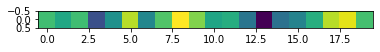

In [12]:
image_index = 233
plt.imshow(testing_dist[image_index])
pred = model.predict(testing_dist[image_index].reshape(1, 1, 20, 1))
print("predict", pred.argmax())
print("actual", testing_label[image_index])

In [13]:
def plotUnknownOrder(matFile, img_numb):
    mat = matFile[img_numb]
    x = mat[0]
    y = mat[1]
    z = mat[2]

    # loading plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # adding points, labels and lines
    try:
        ax.scatter(x,y,z, color='#ff5e5e', s =10, marker='x')
    except:
        pass
    addLabels(ax, x, y, z)
    drawLines(ax, x, y, z)
    dist = drawAllLines(ax, x, y, z)

    # Labeling plot
    ax.set_title("Rat positioning")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    plt.show()
    return dist

def order(data):
    output = []
    for i in range(len(data)):
        pred = model.predict(data[i].reshape(1, 1, 20, 1))
        print(pred.argmax())
        output.append(pred.argmax())
    return np.array(output)

In [14]:
# mat = loadMatFile('split1True')
img_numb = 10

data = getDistData('split1True', img_numb)
data = data.reshape(data.shape[0], 1, 20, 1)
data = data.astype('float32')
temp = order(data)
print(temp)
# for i in range (1):
#     dist = printPlot(mat, i)  
#     heatMap(dist)

loading: split1True
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
0
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
12
4
8
12
17
8
9
10
11
12
13
14
15
19
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3
  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7
  8  9 10 11 12 13 14 15 16 17 18 19  0  0  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19  0  1  2 12  4  8 12 17  8  9 10 11 12 13 14 15
 19 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3
  4  5  6  7  8  9 10 11 12 13 14 15 16